# Houseing Prices

## Content Table

// content table

## Information

La target est la colonne `Sale Price`
Plus d'informations sur les valeurs et la signification des colonnes est disponible dans le fichier `data_description.txt`

Pré: Importation des packages de bases

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Post: Les packages sont importés

## Load data

Pré: Chargement des données dans un dataframe depuis le fichier `train.csv`

In [46]:
housing_prices = pd.read_csv('./train.csv',)
housing_prices.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Post: Le dataframe est chargé dans la variable `housing_prices`

Pré: affichage des informations du dataframe

In [47]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Post: Les informations du dataframe sont affichées. Nous pouvons voir le type de chaque colonnes ainsi que les colonnes comprenant des éléments `null`

Pré:  Affichage des colonnes ayant des éléments `null`
Les colonnes comme `LotFrontage` ou `Alley` devraient apparaitre

In [48]:
columns_null_values = housing_prices.isnull().sum(axis=0)
columns_null_values = columns_null_values[columns_null_values > 0]
print(columns_null_values.shape[0])
columns_null_values

19


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Post: Il y a 19 colonnes comprenants des valeurs nulls

Pré: séparation des features numériques et catégorielles.

In [ ]:
categorical_columns = housing_prices.select_dtypes(include=['object']).columns
numerical_columns = housing_prices.select_dtypes(include=['int64', 'float64']).columns

## Clean Nan Values

Il faut regarder pourquoi certaines valeurs sont vides et voir qu'elle est la meilleur chose à faire pour supprimer toutes les valeurs `null`

- `LotFrontage`: Les maisons n'ayant pas de rue adjacente ont une valeur `null`. Nous pouvons renplacer`none` par `0`
- `Alley`, `MasVnrType`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature`: Ce sont des features contenant une chaine de caractères, `NaN` correspond à "aucun". Nous pouvons remplacer le `null` par une chaine de caractères `"None"`
- MasVnrArea: Les maisons n'ayant pas de "Masonry veneer" n'ont pas de taille. Nous pouvons remplacer les `none` par `0`
- Electrical: Il manque 1 valeur, nous allons la remplacer par la valeur la plus fréquente
- GarageYrBlt: Si il n'y a pas de garage, l'année de construction est nulle. Nous pouvons remplacer `none` par `0`

Pré: Remplacer les `none` des features catégorielles par `"None"`

In [49]:
categorial_null_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in categorial_null_columns:
    housing_prices[col] = housing_prices[col].fillna('None')

Post: les valeurs `none` ont été remplcées par `"None"`

Pré: Remplacer les `none` par `0` pour `MasVnrArea`, `LitFrontage` et `GarageYrBlt`

In [50]:
housing_prices['MasVnrArea'] = housing_prices['MasVnrArea'].fillna(0)
housing_prices['LotFrontage'] = housing_prices['LotFrontage'].fillna(0)
housing_prices['GarageYrBlt'] = housing_prices['GarageYrBlt'].fillna(0)

Post: les valeurs manquantes sont remplacées par 0

Pré: remplacer l'Electrical manquant par la valeur la plus courante grace à la méthode `mode()`, il ne manque qu'une donnée, cela ne devrait pas beaucoup influencé les résultats

In [52]:
housing_prices['Electrical'] = housing_prices['Electrical'].fillna(housing_prices['Electrical'].mode()[0])


Post: La valeur manquante pour `Electrical` a été remplacé  par la valeur la plus courante.

## Data Analyse

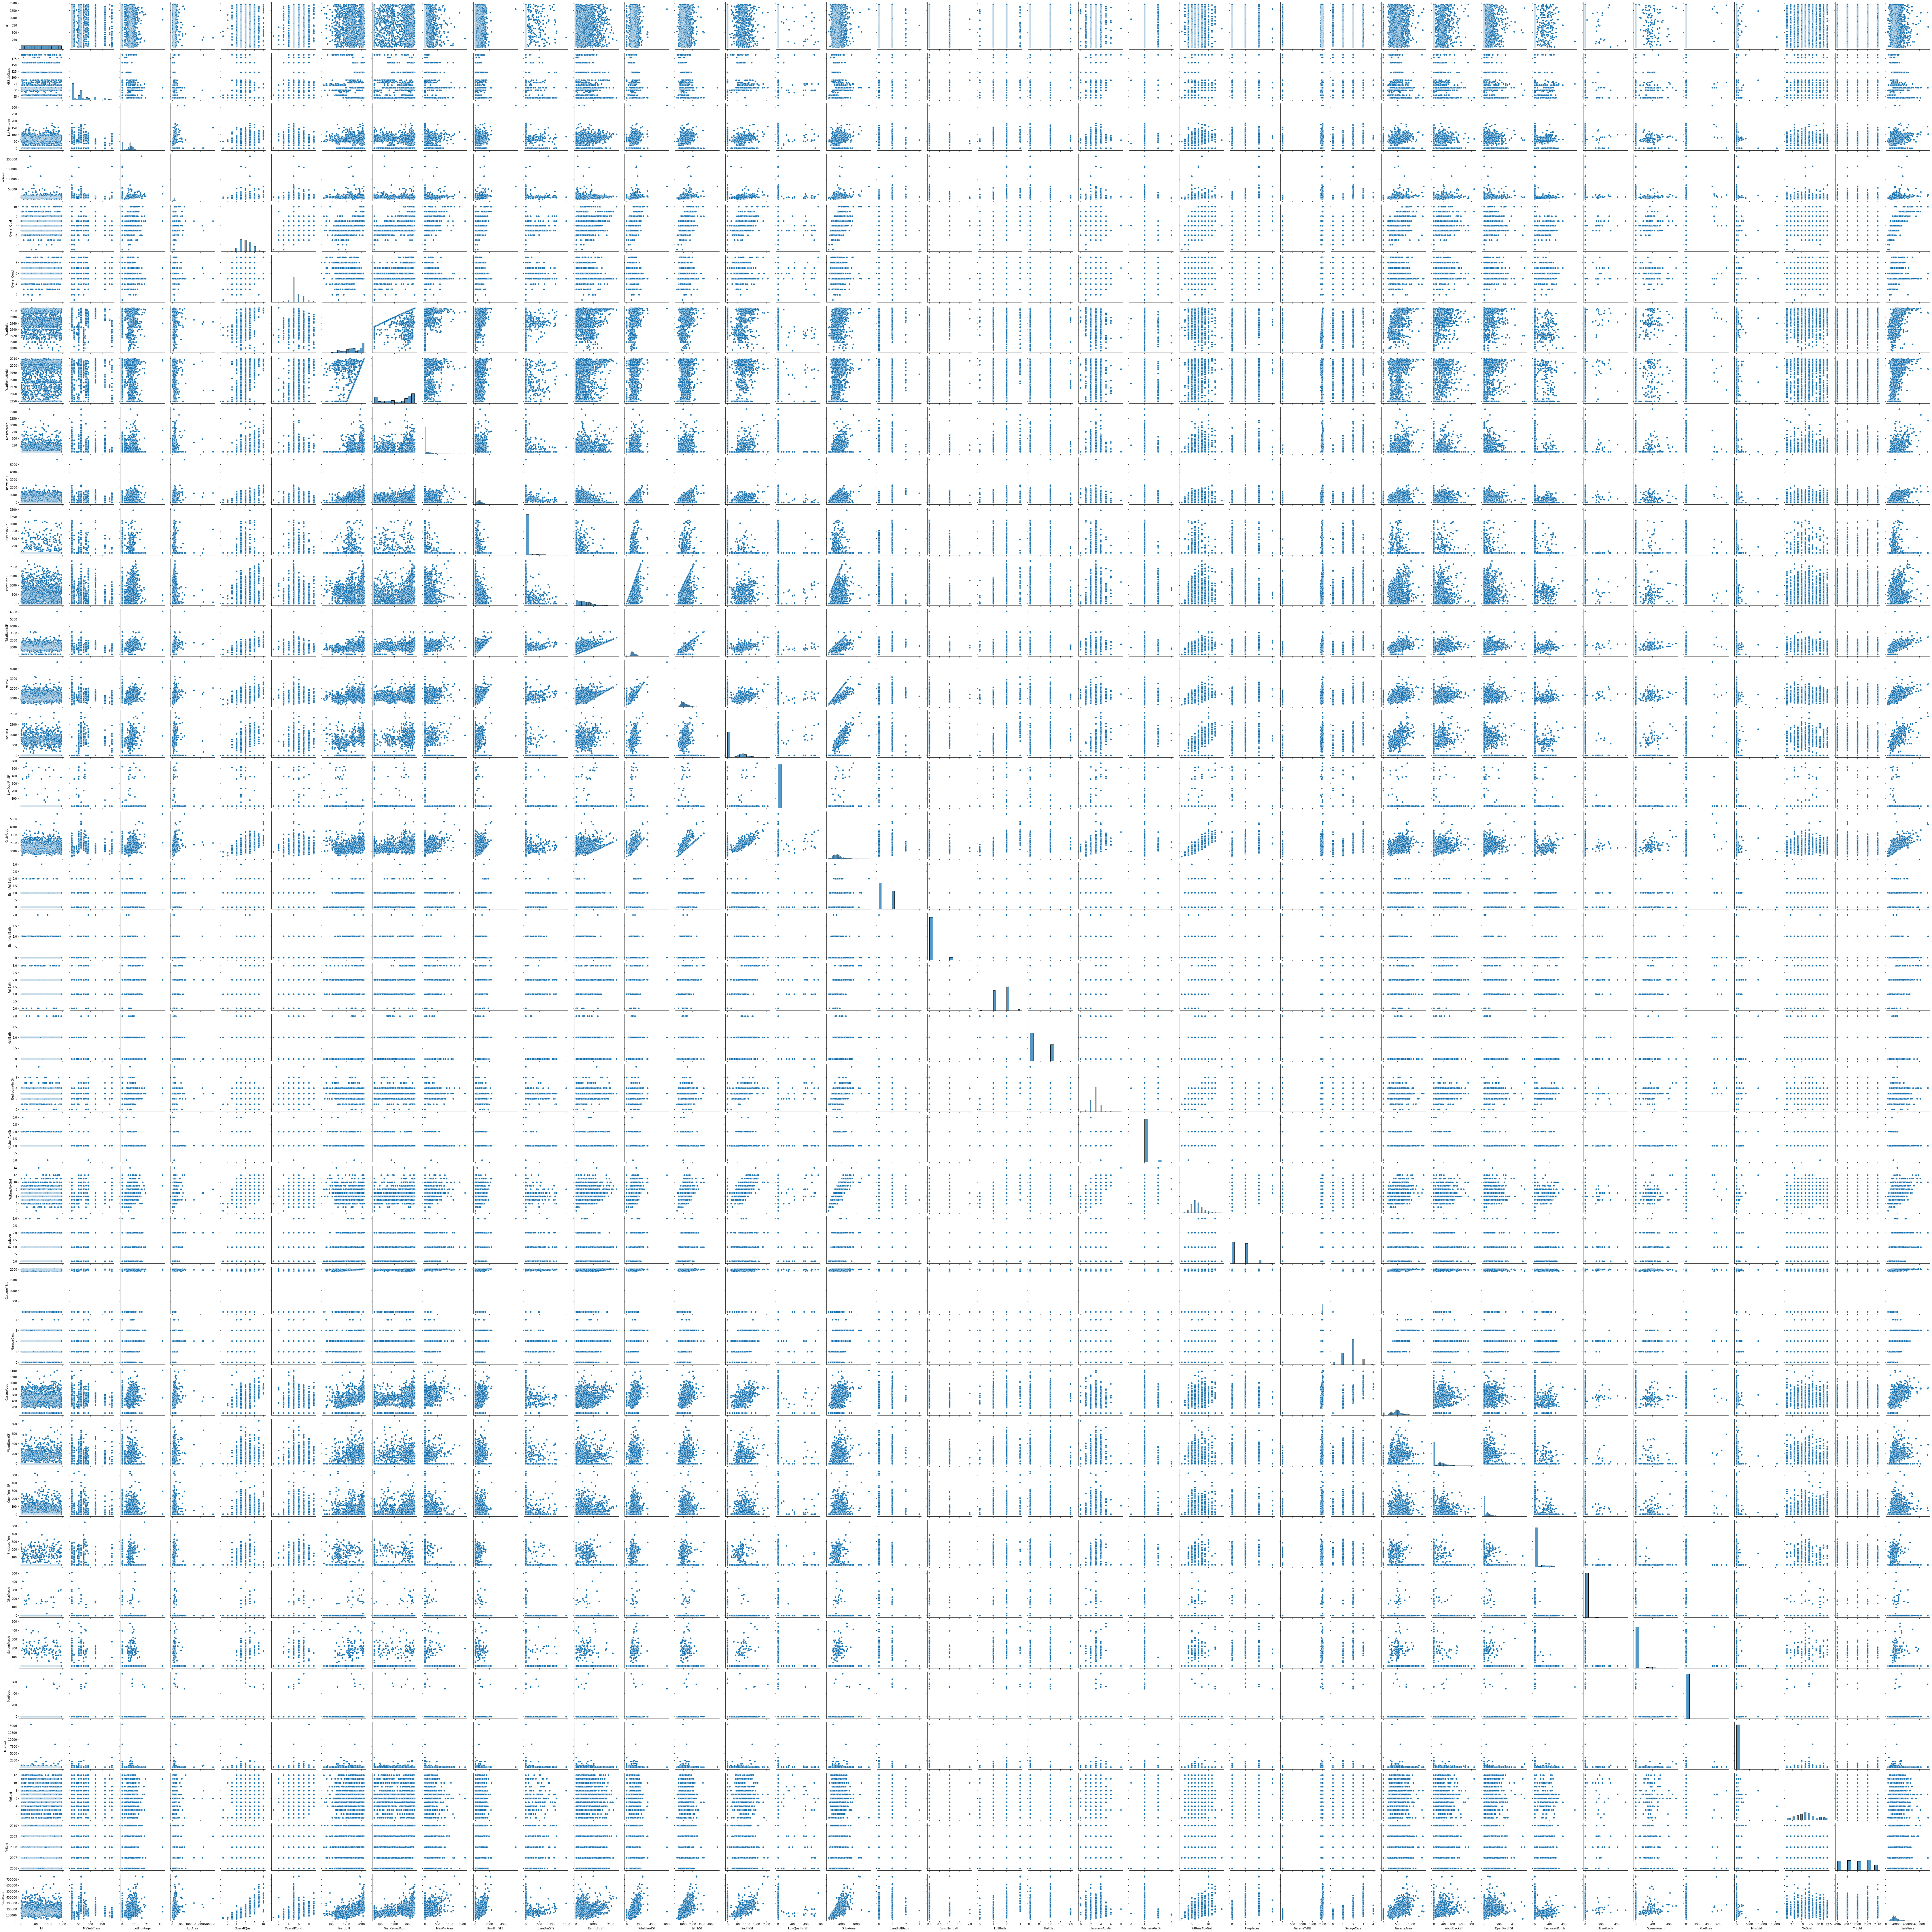